<a href="https://colab.research.google.com/github/joaoadamii/EDA_Walmart_Case/blob/main/Case_Resolution_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business understanding:

Walmart dominates the American retailing industry due to number of factors like its business model which is still a mystery and its effectiveness in not letting the rivals let know about the weaknesses. Wal-Mart made strategic attempts in its formulation to dominate the retail market where it has its presence, growth by expansion in the US and Internationally, create widespread name recognition and customer satisfaction in relation to brand name Walmart and branching into new sectors of retailing.

For over 50 years of operation, Walmart has consistently worked hard to offer low prices to its customers. This is why Walmart has built a wide, strong, and loyal customer base. Customers are constantly assured that they can procure quality products at low prices.

# Defining goal and strategy for achieving it:

Since Walmart's strategic goal is to keep expanding exponentially and keep offering quality products at low prices, the project's goal is to analyze the weekly sales of 45 units over 3 years, and point out which store would be best to expand its size.
It should be shown the step by step of the case analysis, making an introduction and presenting current data about the problem.

The adoption of a strategy is extremaly important for construct a logical path for execution and must be aligned with the business main goal, which is about investing on a store in order to expand its size and keep competitive price and quality among others in the market.
In order to find out which store that would be, some requirements should be defined for that store:

- The store must have the highest number of weekly target hits (weekly sales higher than the store's average weekly sales) per year;
- The store must be able to keep better prices and have a good performance on holidays and not holidays (focos on areas low lower taxes, fuel prices lower than $3.30 and low unemployment rates);
- The store must indicate potential growth;
- The target variable must be the Weekly_Sales value since it defines how any Store is performing.

# Data understanding and data collection:

The dataset that will be used in this analysis covers the weekly sales of 45 stores and characteristics of their regions during the period of 3 years (2010, 2011 and 2012) and is stored in only one data source, which is the Kaggle's platform database and it can be accessed through the website: 
https://www.kaggle.com/yasserh/walmart-dataset

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio
import plotly
from sklearn.preprocessing import scale

In [2]:
# Setting graphs design

sns.set_theme(context='talk', font_scale=.8, style='ticks', rc={
    'figure.figsize':(14,8)
})

In [3]:
# Loading and displaying dataset

data = 'Walmart.csv'

df = pd.read_csv(data, parse_dates=['Date'], dayfirst=True) # Dates are already being formatted to Datetime format

df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
# Checking detaframe's general information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


The dataset structure is formed by 8 columns, 6435 records and has a memory usage of 402.3 KB.
In more details, the dataset structure is formed by the following attributes:

* **Store (int64)**: categorical variable that represents the ID of each store.     
* **Date (datetime64)[ns]**: date type variable and represents the weeks.
* **Weekly_Sales (float64)**: continuous quantiative variable that represents the weekly sales amount of each store.      
* **Holiday_Flag (int64)**: categorical variable that represents if the week is in a holiday (1) or not (0).         
* **Temperature (float64)**: continuous quantiative variable that represents the local temperature of the region.      
* **Fuel_Price (float64)**: continuous quantiative variable that represents the fuel price of the region.      
* **CPI (float64)**: continuous quantiative variable that represents the Consumer Price Index (CPI). It measures the monthly change in prices paid by consumers.  
* **Unemployment (float64)**: continuous quantiative variable that represents the weekly unemployment rate of the region.

By that initial analysis it is possible to confirm that the available data is relevent for gathering enough information about the stores' sales performance in order to achive the goal, but besides that confirmation it's also possible to intially define if there is unnecessary columns and treat data types that were wrongly predefined.

In [5]:
# Creating new date variables (month and year)

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [6]:
# Converting data types

df['Store'] = df['Store'].astype('object')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

In [7]:
# Checking the ocnversions

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Year          6435 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 459.0+ KB


# Data cleaning

Since the store must have the highest number of weekly target hits, keep better prices and have expressed a trend of gowth, the Temperature indicator will not impact on the final suggestion, so it will be exluded from the dataframe in order to have only necessary information.

In [8]:
# Deleting unecessary columns

df.drop(['Temperature'], axis=1, inplace=True)

In [9]:
# Checking 5 last lines

df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Month,Year
6430,45,2012-09-28,713173.95,0,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,3.969,192.330854,8.667,10,2012
6434,45,2012-10-26,760281.43,0,3.882,192.308899,8.667,10,2012


In [10]:
# Checking for duplicate lines

subset = None

print(df.duplicated(subset=subset).any())

False


In [11]:
# Checking for missing values

total_missing = df.isnull().sum().sort_values(ascending=False) # Storing the sum of missing values in a variable
percentage_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # Storing the percentage of missing values in a variable

missing_data = pd.concat([total_missing, percentage_missing], axis=1, keys=['Total Missing', 'Percentage Missing']) # Concating variables

missing_data

,Total Missing,Percentage Missing
Store,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Month,0,0.0
Year,0,0.0


No missing and duplicated values were found in the dataframe, so no changes is needed at the moment.

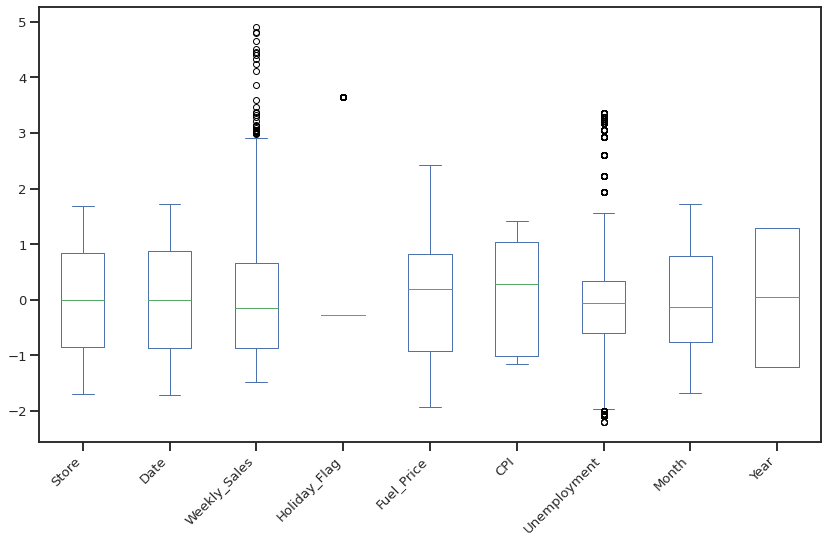

In [12]:
# Checking for outliers through boxplot with normalized data 

df.apply(scale).plot.box() # Applying Scale function to normalize the data
plt.xticks(rotation=45, 
           ha='right');


With the boxplot above it's possible to notice how the data is distributed along a range defined by its min and max values, and it helps to understand the presence of outliers.

Even if the dataframe has outliers, which fall more than the specified distance from the first and third quartile, the best choice is to confirm if that data distribution makes sense for the business.

In this case, it's possible to observe that there're records from Weekly_Sales and Unemployment attributes which have values out of between the lower bound and upper bound, but those values are relevant for the business since they are Stores which have a better performance than others. Also, the unemployment rate depends a lot on the region, so at the same time that there're regions with a high life quality, there are regions with a low life quality as well.

By that thought, no data will be replaced and deleted.

# Exploratory Data Analysis:

Before anything, it's import to analyze some basics statistic metrics in order to understand more about the data we are working with.

This is possible by using the .describe() method as shown below:

In [13]:
# Getting initial statistics about the dataframe

pd.set_option('display.float_format', lambda x: '%.2f' % x) # Removing Cientific Notation
df.describe()

,Weekly_Sales,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,3.36,171.58,8.00,6.45,2010.97
std,564366.62,0.46,39.36,1.88,3.24,0.80
min,209986.25,2.47,126.06,3.88,1.00,2010.00
25%,553350.10,2.93,131.74,6.89,4.00,2010.00
50%,960746.04,3.44,182.62,7.87,6.00,2011.00
75%,1420158.66,3.73,212.74,8.62,9.00,2012.00
max,3818686.45,4.47,227.23,14.31,12.00,2012.00


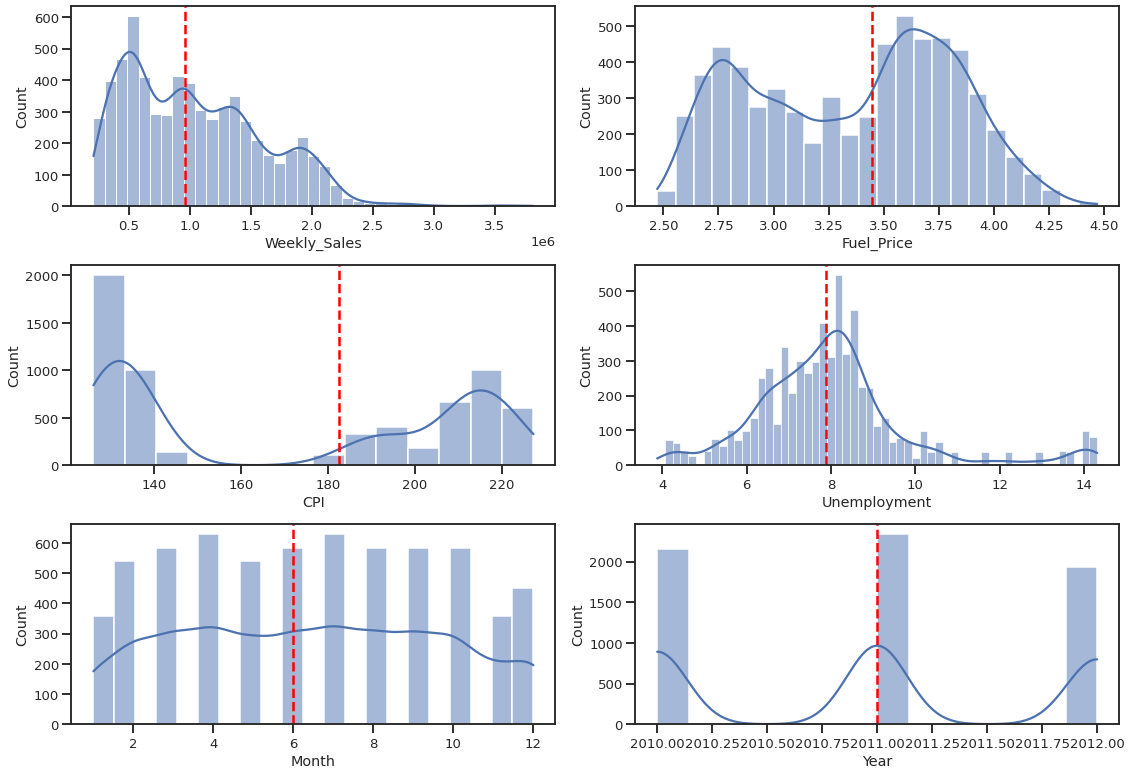

In [14]:
# Analysis of numeric data distribution

cols = 2 # Defining number of columns
rows = 4 # Defining number of rows
variables = df.select_dtypes(exclude=['category', 'datetime64[ns]', 'object']).columns # Excluding data types that won't be analyzed
fig = plt.figure(figsize= (16,14)) # Setting graph size

# Applying a loop function to add subplots of histogram and a median line for each variable

for i, col in enumerate(variables):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x= df[col], 
                 ax= ax, 
                 kde=True)
    
    plt.axvline(x= df[col].median(),
                color='red',
                ls='--', 
                lw=2.5)
    
fig.tight_layout()  
plt.show()

By the distribtion analysis above together with the ouput from the describe method, the following insights are acquired:

The Weekly_Sales presents a multimodal distribution and is positively skewed, which means that there're oscilation on the weekly sales values and that the mean is greater than the median. The amount of money earned by the stores will differ. Earning depends upon working capacity, opportunities, and other factor, so the main cause of positively skewed distribution is unequal distribution.

The Fuel_Price follows a bimodal distribution and it's meadian is higher than the mean of all records (50% of the stores are located in a region where the fuel price are higher than the mean). This is explained just by understanding that 45 stores are being analyzed and each region has its own precification and taxes, which also explain how the CPI's distribution behaves.

The Unemployment distribution shows that 50% of the stores have unemployment rates below the mean, and it also shows extreme values, but since it makes sense for the analysis, nothing will me done regarding that. 



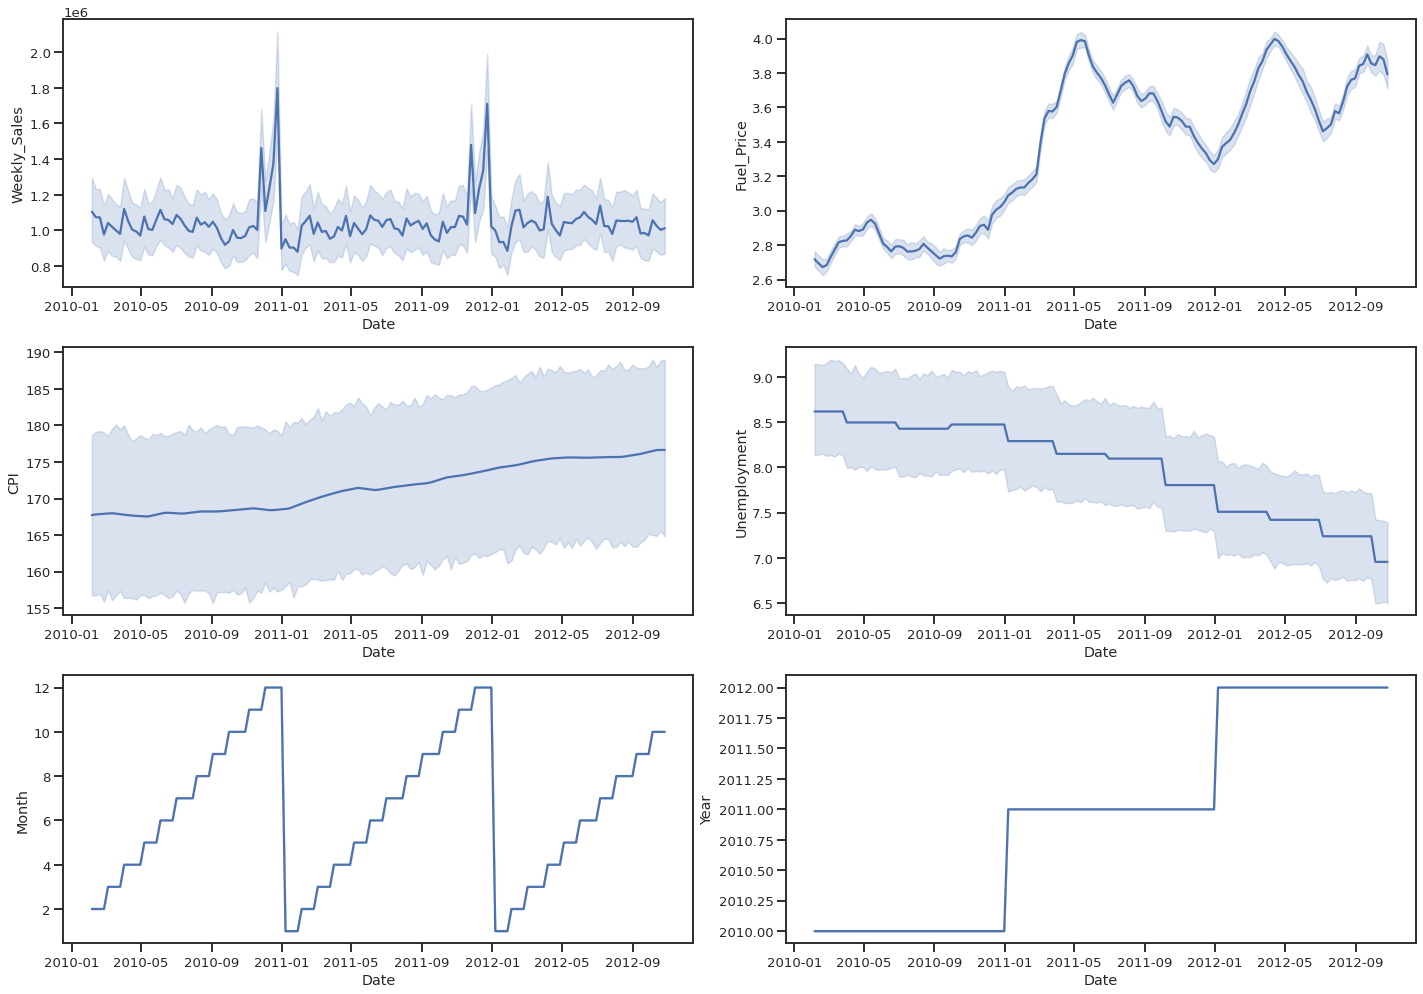

In [15]:
# Analysis of numeric data bevahior over time

cols = 2
rows = 4
variables = df.select_dtypes(include=np.number).columns # Including only numerical values
fig = plt.figure(figsize= (20,18)) # Setting graph size

# Applying a loop function to add subplots for analyzing the behavior of the variables over time

for i, col in enumerate(variables):
    
    ax=fig.add_subplot(rows,cols,i+1)
    sns.lineplot(data=df, 
                 x= 'Date', 
                 y= df[col])
    
fig.tight_layout()  
plt.show()

Also, by analyzing the behavior of the variables over time, the following insights are available:

There are clearly peeks around the end of the year, which can be easily explained due to the two most important holidays of the year, Thanksgiven and Christmas.

The Fuel Price has peaks and valleys, but it's behavior over time shows a trend of rising prices.

The min, max and the mean of CPI Price have been constantly increasing over time.

Opposite to the CPI, the unemployment rate have been descreasing over time, which could mean to be a good chance to invest.

After extacting some metrics and undestand how the data is distributed, it's important to discover if the variables have inluence over the others, and more important, what are the variables that impact on the behavior of the target variable. If there is any, so there is a correlation between them.

When undestanding the correlation between the target variable and the others, then it's possible to answer business questions which will guide to the achievement of the project's goal.

In [17]:
# Checking what variables have the highest correlation (positive or negative) with the target variable: 'Weekly_Sales'

df.corr().loc['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales   1.00
Unemployment   0.11
Month          0.08
CPI            0.07
Year           0.02
Fuel_Price     0.01
Name: Weekly_Sales, dtype: float64

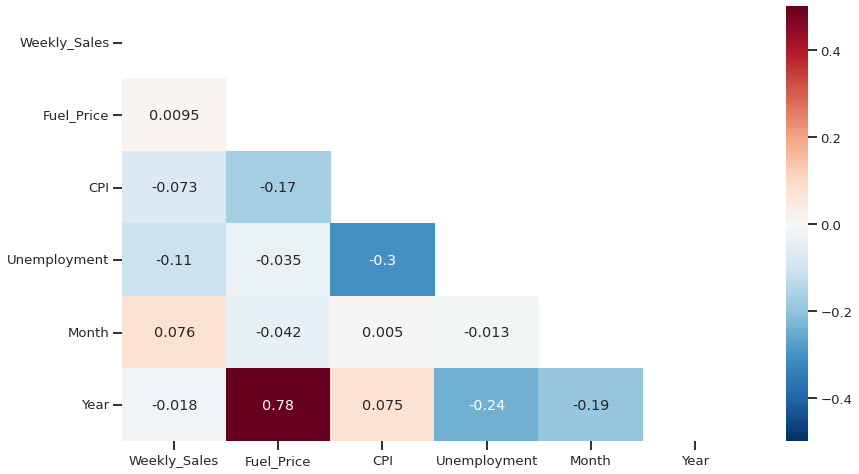

In [18]:
# Plotting a heatmap to analyze the correlations

df_corr = df[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']].corr()

mask = np.zeros(df_corr.shape).astype(bool) # Creating a mask to 
mask[np.triu_indices_from(mask)] = True
mask

sns.heatmap(df_corr, annot=True, center=0, cmap= 'RdBu_r', mask=mask, vmin=-0.5, vmax=0.5);

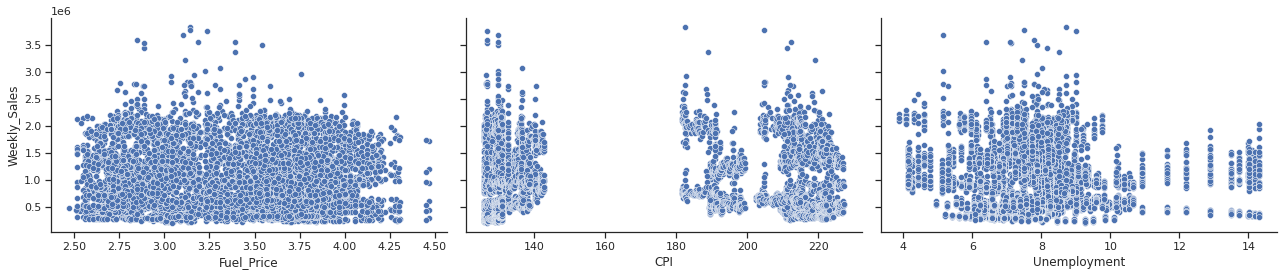

In [19]:
# Analyzing the correlation between the Weekly Sales and other variables through the scatterplot

x_vars = ['Fuel_Price', 'CPI', 'Unemployment']
y_vars = ['Weekly_Sales']

sns.set_context('notebook')

sns.pairplot(data=df, x_vars=x_vars, y_vars=y_vars, height=4, aspect= 1.5)

plt.tight_layout()

Through the analysis above it's not possible to identify a pattern of regression in order to conclude a strong correlation, but it's possible to notice that:

2. The highest sales are identified when the Fuel Price is aorund $ 2.75 - $ 3.50.
3. Technically, the CPI affects the sales, but in this dataset, 50% of the sales are registered with a CPI equals to 180 or below.
4. The highest sales are identified when Unemployment Rate is under lower than 9.

After analyzing the distribution of numerical values, their behavior over time and the correlation between the variables, we can now start to analyze the target variable in more details in order to get to a conclusion of which store is the best for expanding its size.

# What are the 10 stores with the highest mean weekly sales?

In [20]:
# Calculating the mean price of Weekly Sales per Store

top_mean_sales = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)).head(10)
top_mean_sales


,Weekly_Sales
Store,
20,2107676.87
4,2094712.96
14,2020978.40
13,2003620.31
2,1925751.34
10,1899424.57
27,1775216.20
6,1564728.19
1,1555264.40


# How do the sales behave over the years? 

In [21]:
# Grouping the mean of Weekly Sales by month and year

monthly_performance = pd.DataFrame(df.groupby(['Month','Year'])['Weekly_Sales'].agg('mean')).reset_index()
monthly_performance

,Month,Year,Weekly_Sales
0,1,2011,909466.48
1,1,2012,938302.62
2,2,2010,1057405.46
3,2,2011,1035174.04
4,2,2012,1067019.89
5,3,2010,1010665.57
6,3,2011,996424.71
7,3,2012,1028931.78
8,4,2010,1028499.41
9,4,2011,1006784.49


In [22]:
# Observing how is the performance for each month over the years

fig = px.line(monthly_performance, 
              x='Month', 
              y='Weekly_Sales', 
              color='Year', 
              markers=True, 
              color_discrete_sequence=px.colors.diverging.Portland, 
              title='Sales (Mean) Performance for each Month over the Years')

fig.show()

The line graph above shows the cumulative weekly sales per month and the comparison among the years.

By that graph it's possible to notice that the stores have better performance in the months below:

1. December
2. November
3. June
4. February
5. August


It's also possible to notice that 2012 wasn't the best year only because there is no data from after October.

In [23]:
# Observing What is the year with the highest cumulative sales

year_sales = pd.DataFrame(df.groupby(['Year'])['Weekly_Sales'].sum()).reset_index()

fig = px.pie(year_sales, 
             values='Weekly_Sales', 
             names='Year', 
             color_discrete_sequence=px.colors.diverging.Portland, 
             title= 'Cumulative Sales by Year')

fig.show()

By analyzing the cumulative sales for all three years, it's noticed that 2011 was the year with highest amount of sales ($2,448M), followed by 2010 ($2,288M) and then 2012 ($2,000M).

# Are holidays responsible for the most part of the earnings over the years?

We will now analyze the max, min and mean weekly sales from all the stores over the whole period, considering the main Holidays of the year.

In [24]:
# Defining the Holidays of the year and its respective days

holiday_dict = {
    'Super Bowl': ['12-Feb-10', '11-Feb-11', '10-Feb-12'],
    'Labour Day': ['10-Sep-10', '09-Sep-11', '07-Sep-12'],
    'Thanksgiving': ['26-Nov-10', '25-Nov-11', '23-Nov-12'],
    'Christmas': ['31-Dec-10', '30-Dec-11', '28-Dec-12']
}

# Converting holidays to date time format

holiday_dict_to_datetime = {k: pd.to_datetime(v, format= '%d-%b-%y') for k, v in holiday_dict.items()}

In [58]:
# Grouping the stores by their min, max, and mean weekly sales 

# df_agg = pd.DataFrame(df.groupby('Date')['Weekly_Sales'].agg(['min', 'max', 'mean']).reset_index())

# plt.figure(figsize = (16, 8))

# Plotting a lineplot to analyze the mean weekly sales over time

# ax = sns.lineplot(df_agg, x= 'Date', y= 'mean')

# ax.fill_between(x=df_agg.Date, 
#                y1=df_agg['min'], 
#                y2=df_agg['max'], 
#                alpha=.2) # Applying min and max values of weekly sales


# Definining min and max limits for weekly sales

# ymin, ymax = ax.get_ylim() # ax.get_ylim returns the lower(min) and upper(max) limits

# for i, (holiday, dates) in enumerate(holiday_dict_to_datetime.items()):
#   ax.vlines(x= dates, 
#             ymin=ymin, 
#             ymax=ymax, 
#             label=holiday, 
#             color= f'C{i}')

# plt.title('Analysing Weekly Sales over the years and considering the main Holidays',
#          fontsize='20')
# plt.legend()
# plt.show()


In [26]:
# Grouping the mean of Weekly Sales by Holiday_Flag and year

year_holiday = pd.DataFrame(df.groupby(['Year', 'Holiday_Flag'])['Weekly_Sales'].agg('mean')).reset_index()

# Verifying sales on Holidays and not Holidays over the years

fig = px.histogram(year_holiday, 
                   x='Year', 
                   y='Weekly_Sales', 
                   color='Holiday_Flag', 
                   barmode='group', 
                   height=400, 
                   color_discrete_sequence=px.colors.diverging.Portland, 
                   title='Sales on Holidays(1) vs. not Holidays(0)')

print('Count of Sales Registered on Holidays(1) vs. not Holidays(0):')
print(df['Holiday_Flag'].value_counts())
fig.show()

Count of Sales Registered on Holidays(1) vs. not Holidays(0):
0    5985
1     450
Name: Holiday_Flag, dtype: int64


Even though there are more sales occurences on not Holidays than on Holidays, it's possible to notice an increse of sales during the main holidays of the year, and the total earning amount related to sales on Holidays is higher than not Holidays for all the years.

This is explained by Walmart being the leader of the retail stores around the world and their appealing discounts on Holidays.

# How is the mean Fuel Price distributed among the stores?

In [27]:
# Analyzing the mean, min and max Fuel Price for each store

df_fuel = df.groupby('Store')['Fuel_Price'].agg(['min', 'max', 'mean']).reset_index()

df_fuel


,Store,min,max,mean
0,1,2.51,3.91,3.22
1,2,2.51,3.91,3.22
2,3,2.51,3.91,3.22
3,4,2.54,3.88,3.22
4,5,2.51,3.91,3.22
5,6,2.51,3.91,3.22
6,7,2.55,3.94,3.24
7,8,2.51,3.91,3.22
8,9,2.51,3.91,3.22
9,10,2.83,4.47,3.58


In [28]:
# Plotting Mean Fuel Price for each store

fig = px.bar(df_fuel, 
             y= 'mean', 
             x= 'Store', 
             text_auto= '.3s', 
             color= 'mean', 
             title= 'Store VS. Fuel Price - Mean')

fig.update_traces(textfont_size= 12,
                  textposition= 'outside', 
                  cliponaxis= False)

fig.update_layout(bargap= 0.01,
                  bargroupgap= 0,
                  autosize= True)

fig.show()

# Plotting Min Fuel Price for each store

fig = px.bar(df_fuel, 
             y= 'min', 
             x= 'Store', 
             text_auto= '.3s', 
             color= 'min', 
             title= 'Store VS. Fuel Price - Min')

fig.update_traces(textfont_size= 12, 
                  textposition= 'outside', 
                  cliponaxis= False)

fig.update_layout(bargap= 0.01,
                  bargroupgap= 0,
                  autosize= True)

fig.show()

# Plotting Max Fuel Price for each store

fig = px.bar(df_fuel, 
             y= 'max', 
             x= 'Store', 
             text_auto= '.3s', 
             color= 'max', 
             title= 'Store VS. Fuel Price - Max')

fig.update_traces(textfont_size= 12,  
                  textposition= 'outside', 
                  cliponaxis=False)

fig.update_layout(bargap= 0.01,
                  bargroupgap= 0,
                  autosize= True)

fig.show()

# What are the 10 Stores with the Lowest mean of Unemployment rate?

In [29]:
# Analyzing the 10 stores with the lowest Unemployment rate

lowest_unemployment = pd.DataFrame(df.groupby('Store')['Unemployment'].mean().sort_values(ascending=True).reset_index().head(10))
lowest_unemployment

,Store,Unemployment
0,23,4.80
1,40,4.80
2,4,5.96
3,8,6.09
4,9,6.10
5,5,6.30
6,16,6.48
7,17,6.55
8,6,6.61
9,44,6.74


# What are the 10 stores with the highest mean amount of sales on Holidays?


In [30]:
# Observing what is the store with the highest mean amount of sales on Holidays

df_Holiday = df[df['Holiday_Flag'] == 1]

top_holiday_sales = pd.DataFrame(df_Holiday.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending= False)).head(10)

top_holiday_sales

,Weekly_Sales
Store,
20,2249035.08
4,2243102.62
14,2120583.00
10,2113755.95
13,2113043.81
2,2079266.90
27,1892299.28
6,1680907.93
1,1665747.66


# What are the 10 stores with most target hits over the years?

In [31]:
# Adding a Mean_Sales column to the dataframe

df = df.merge(df.groupby(['Store'])['Weekly_Sales'].mean(), how= 'inner', on= 'Store').rename(columns= {'Weekly_Sales_x':'Weekly_Sales', 'Weekly_Sales_y': 'Mean_Sales'})

In [32]:
# Adding a 'Hit_Target' column to the dataframe in order to check if the store hit the weekly target

df['Hit_Target'] = df['Weekly_Sales'] > df['Mean_Sales']

In [33]:
# Analyzing what are the stores with the most target hits in all the whole period

pd.DataFrame(df.groupby(['Store'])['Hit_Target'].sum().sort_values(ascending= False)).head(10)

,Hit_Target
Store,
43,73
42,71
36,71
37,69
38,68
30,68
33,67
26,67
14,66


In [34]:
# Analyzing what are the stores with the most target hits per year

df_target_hit = df.groupby(['Year', 'Store'])['Hit_Target'].sum().reset_index().sort_values(['Year', 'Hit_Target'], ascending= False)
df_target_hit

,Year,Store,Hit_Target
127,2012,38,43
133,2012,44,42
128,2012,39,35
92,2012,3,34
93,2012,4,33
...,...,...,...
3,2010,4,8
30,2010,31,8
38,2010,39,7
43,2010,44,2


In [35]:
# Storing the best stores per year on a new varible for each year

target_hits_2010 = df_target_hit[df_target_hit['Year'] == 2010].head(10)
target_hits_2011 = df_target_hit[df_target_hit['Year'] == 2011].head(10)
target_hits_2012 = df_target_hit[df_target_hit['Year'] == 2012].head(10)

# Concating the 3 previous dataframes

target_hits = pd.concat([target_hits_2010, target_hits_2011, target_hits_2012], ignore_index= True).sort_values(['Year', 'Hit_Target'], ascending= False)
target_hits

,Year,Store,Hit_Target
20,2012,38,43
21,2012,44,42
22,2012,39,35
23,2012,3,34
24,2012,4,33
25,2012,5,30
26,2012,37,30
27,2012,41,29
28,2012,9,28
29,2012,17,27


In [36]:
# Plotting the Stores with most Target Hits by year

fig = px.histogram(target_hits, 
                   x= 'Year', 
                   y= 'Hit_Target', 
                   color= 'Store', 
                   barmode= 'group',
                   text_auto= True,
                   height= 400,
                   title= 'Stores with most Target Hits by year')

fig.update_traces(textfont_size= 12,  
                  textposition= 'outside', 
                  cliponaxis=False)

fig.update_layout(bargap= 0.01,
                  bargroupgap= 0,
                  autosize= True)

fig.show()
 

# What is the best store to expand its size?

The strategy to define the best store to invest on, wil be method to analyse trends.
One of the ways to identify trends is to calculate the moving average from the variable of interest.

In [37]:
# Sorting dataframe by Date and Store

df_sorted = df.sort_values(['Store', 'Date']).reset_index(drop= True)
df_sorted

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Month,Year,Mean_Sales,Hit_Target
0,1,2010-02-05,1643690.90,0,2.57,211.10,8.11,2,2010,1555264.40,True
1,1,2010-02-12,1641957.44,1,2.55,211.24,8.11,2,2010,1555264.40,True
2,1,2010-02-19,1611968.17,0,2.51,211.29,8.11,2,2010,1555264.40,True
3,1,2010-02-26,1409727.59,0,2.56,211.32,8.11,2,2010,1555264.40,False
4,1,2010-03-05,1554806.68,0,2.62,211.35,8.11,3,2010,1555264.40,False
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,4.00,192.01,8.68,9,2012,785981.41,False
6431,45,2012-10-05,733455.07,0,3.98,192.17,8.67,10,2012,785981.41,False
6432,45,2012-10-12,734464.36,0,4.00,192.33,8.67,10,2012,785981.41,False
6433,45,2012-10-19,718125.53,0,3.97,192.33,8.67,10,2012,785981.41,False


In [38]:
# Calculating the moving average of Weekly Sales

groups = df.groupby('Store')['Weekly_Sales']

# Adding Trend and ID columns to the Dataframe

df_sorted['Trend'] = groups.transform(lambda x: scale(x.rolling(4*12, center= True).mean()))
df_sorted['ID'] = groups.cumcount() + 1

df_sorted.head(50)

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Month,Year,Mean_Sales,Hit_Target,Trend,ID
0,1,2010-02-05,1643690.90,0,2.57,211.10,8.11,2,2010,1555264.40,True,NaN,1
1,1,2010-02-12,1641957.44,1,2.55,211.24,8.11,2,2010,1555264.40,True,NaN,2
2,1,2010-02-19,1611968.17,0,2.51,211.29,8.11,2,2010,1555264.40,True,NaN,3
3,1,2010-02-26,1409727.59,0,2.56,211.32,8.11,2,2010,1555264.40,False,NaN,4
4,1,2010-03-05,1554806.68,0,2.62,211.35,8.11,3,2010,1555264.40,False,NaN,5
5,1,2010-03-12,1439541.59,0,2.67,211.38,8.11,3,2010,1555264.40,False,NaN,6
6,1,2010-03-19,1472515.79,0,2.72,211.22,8.11,3,2010,1555264.40,False,NaN,7
7,1,2010-03-26,1404429.92,0,2.73,211.02,8.11,3,2010,1555264.40,False,NaN,8
8,1,2010-04-02,1594968.28,0,2.72,210.82,7.81,4,2010,1555264.40,True,NaN,9
9,1,2010-04-09,1545418.53,0,2.77,210.62,7.81,4,2010,1555264.40,False,NaN,10


In [39]:
# Plotting a graph for trend analysis

px.line(df_sorted, 
        x= 'Date', 
        y= 'Trend', 
        color= 'Store', 
        title= 'Trend Analysis')

From the trend lines above, it is possible to define the regression line for each store, and thus understand which store has the highest growth trend from the slope of the regression line.

Follow the example below:

Previously, it was discovered that the store 20, is the store with the highest mean weekly sales in the whole period. So, let's take a look at it's regression line.

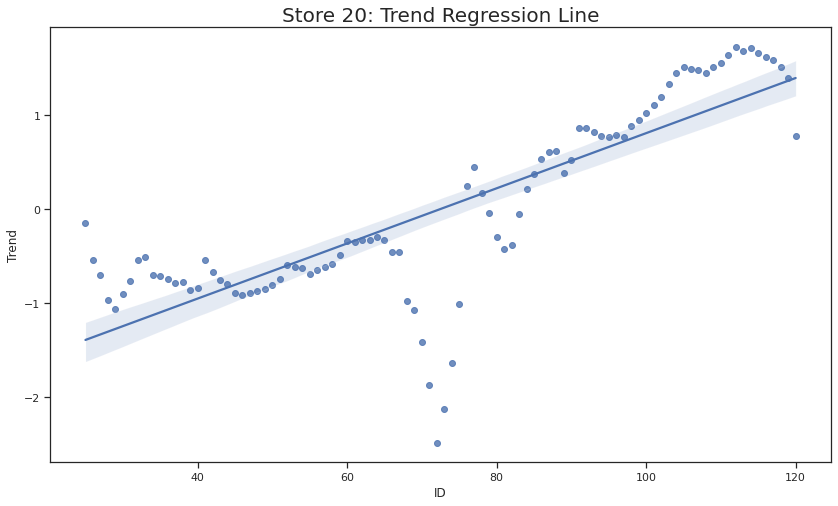

In [40]:

sns.regplot(data= df_sorted.query('Store==20'), 
            x= 'ID', 
            y= 'Trend')

plt.title('Store 20: Trend Regression Line',
          fontsize= '20');

Now we want to identify which store has the largest slope angle of the line.
In order to do that, the coefficient of slope angle should be calculated.

In [41]:
# Calculating the linear coefficient in order to analyse which store has the highest growth trend
# It will be used the Store 20 in order to get the linear coefficient

sub_df = df_sorted.query('Store==20').dropna().copy()

np.polyfit(sub_df.ID, sub_df.Trend, deg=1)

array([ 0.02935057, -2.12791652])

In [42]:
# Applying function to define the coefficient that represents each store

def get_trend_coeff(sub_df):
    sub_df = sub_df.dropna()
    coeff, intercept = np.polyfit(sub_df.ID, sub_df.Trend, deg=1)
    return coeff

In [43]:
# Grouping the stores by their linear coefficient

coeffs = df_sorted.groupby('Store').apply(get_trend_coeff).sort_values(ascending=False)
coeffs

Store
38    0.04
42    0.04
4     0.04
41    0.04
9     0.04
44    0.04
39    0.04
37    0.04
7     0.03
17    0.03
1     0.03
32    0.03
3     0.03
5     0.03
13    0.03
12    0.03
31    0.03
11    0.03
8     0.03
40    0.03
34    0.03
20    0.03
16    0.03
26    0.03
23    0.03
45    0.02
6     0.02
33    0.01
28    0.01
25    0.01
22    0.00
24   -0.00
2    -0.01
10   -0.01
29   -0.02
18   -0.02
43   -0.02
19   -0.03
30   -0.03
21   -0.03
35   -0.03
15   -0.03
27   -0.03
14   -0.03
36   -0.04
dtype: float64

In [44]:
# Filtering the Stores with top 10 coefficients

df_sorted[df_sorted.Store.isin(coeffs.head(10).index)]

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Month,Year,Mean_Sales,Hit_Target,Trend,ID
429,4,2010-02-05,2135143.87,0,2.60,126.44,8.62,2,2010,2094712.96,True,NaN,1
430,4,2010-02-12,2188307.39,1,2.57,126.50,8.62,2,2010,2094712.96,True,NaN,2
431,4,2010-02-19,2049860.26,0,2.54,126.53,8.62,2,2010,2094712.96,False,NaN,3
432,4,2010-02-26,1925728.84,0,2.59,126.55,8.62,2,2010,2094712.96,False,NaN,4
433,4,2010-03-05,1971057.44,0,2.65,126.58,8.62,3,2010,2094712.96,False,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,44,2012-09-28,355307.94,0,3.82,131.04,5.41,9,2012,302748.87,True,NaN,139
6288,44,2012-10-05,337390.44,0,3.81,131.08,5.22,10,2012,302748.87,True,NaN,140
6289,44,2012-10-12,337796.13,0,3.80,131.11,5.22,10,2012,302748.87,True,NaN,141
6290,44,2012-10-19,323766.77,0,3.78,131.15,5.22,10,2012,302748.87,True,NaN,142


In [45]:
# Plotting a graph for trend analysis from the 10 stores with the highest linear coefficients

px.line(df_sorted[df_sorted.Store.isin(list(coeffs.head(10).index))], 
        x= 'Date', 
        y= 'Trend', 
        color= 'Store',
        title= 'Trend analysis from the 10 stores with the highest linear coefficients')

In [46]:
# Plotting a linear graph of Weekly Sales behavior over time from the 10 stores with the highest linear coefficients 

px.line(df_sorted[df_sorted.Store.isin(list(coeffs.head(10).index))], 
        x= 'Date', 
        y= 'Weekly_Sales', 
        color= 'Store', 
        title= 'Weekly Sales behavior from the 10 stores with the highest linear coefficients')

# Conclusion

After analyzing the data taking into account all the requirements, we can now point out which store among all the 45 stores is the best for Walmart to expand its size.

So, let's take a look at the results:

- **What are the 10 stores with the highest mean weekly sales?**

1. Store **20**: $ 2,107,676.87

2. Store **4**:	$ 2,094,712.96

3. Store **14**: $ 2,020,978.40

4. Store **13**: $ 2,003,620.31

5. Store **2**: $ 1,925,751.34

6. Store **10**: $ 1,899,424.57

7. Store **27**: $ 1,775,216.20

8. Store **6**: $ 1,564,728.19

9. Store **1**: $ 1,555,264.40

10. Store **39**: $ 1,450,668.13


- **What is the store with the highest number of weekly target hits (weekly sales higher than the store's average weekly sales)?**

1. Store **43**:    73 Target Hits 

2. Store **42**:	71 Target Hits

3. Store **36**:	71 Target Hits

4. Store **37**:	69 Target Hits

5. Store **38**:	68 Target Hits

6. Store **30**:	68 Target Hits

7. Store **33**:	67 Target Hits

8. Store **26**:	67 Target Hits

9. Store **14**:	66 Target Hits

10. Store **44**:	66 Target Hits

- **What are the stores with lowest mean of Fuel Price?**


1. Store **36**: $ 3.20

2. Store **34**: $ 3.22

3. Store **4**:  $ 3.22

4. Store **1**:  $ 3.22

5. Store **21**: $ 3.22

6. Store **37**: $ 3.22

7. Store **39**: $ 3.22

8. Store **31**: $ 3.22

9. Store **11**: $ 3.22

10. Store **30**: $  3.22

11. Store **9**: $  3.22

12. Store **8**: $ 3.22

13. Store **6**: $ 3.22

14. Store **5**: $ 3.22

15. Store **3**: $ 3.22

16. Store **2**: $ 3.22

17. Store **43**: $ 3.22

18. Store **41**: $ 3.24

19. Store **7**: $ 3.24

20. Store **16**: $ 3.24

21. Store **32**: $ 3.24 

22. Store **17**: $ 3.29 

23. Store **44**: $ 3.29 

24. Store **13**: $ 3.29 

- **What are the 10 Stores with the Lowest mean of Unemployment rate?**


1. Store **23**:	4.80

2. Store **40**:	4.80

3. Store **4**: 	5.96

4. Store **8**: 	6.09

5. Store **9**: 	6.10

6. Store **5**: 	6.30

7. Store **16**:	6.48

8. Store **17**:	6.55

9. Store **6**: 	6.61

10. Store **44**:	6.74

- **What are the 10 Stores with the highest potential of growth?**

1. Store **38**: 0.04°

2. Store **42**: 0.04°

3. Store **4**:  0.04°

4. Store **41**: 0.04°

5. Store **9**:  0.04°

6. Store **44**: 0.04°

7. Store **39**: 0.04°

8. Store **37**: 0.04°

9. Store **7**:  0.03°

10. Store **17**: 0.03°

From the analyses carried out previously, taking into account the requirements for the definition of the best store to invest in its expansion, it was possible to determine that the best store is the store 44.

The store 44 was the chosen one, because the store is within the expected for most of the requirements. Even though the store 44 doesn't have one of the highest mean Weekly Sales of all the period, it fits into the TOP 10 stores with the highest amount of Target Hits throughtout the years, it also have one of the lowest mean fuel price and unemployment rate among the 45 stores, and has the 4th highest growth line.

The Store 44 has a mean Weekly Sales equal to $ 302,748.87, which shows a great opportunity to increase the earnings of this store.